In [57]:
import pandas as pd
df=pd.read_csv("/content/SVMtrain.csv")
df
# step1"Imported Required libraries

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...,...
884,887,0,2,Male,27.0,0,0,13.0000,3
885,888,1,1,female,19.0,0,0,30.0000,3
886,889,0,3,female,60.0,1,2,23.4500,3
887,890,1,1,Male,26.0,0,0,30.0000,1


In [58]:
# Step2:EDA1
df.shape

(889, 9)

In [59]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.6+ KB


In [61]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [62]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,35.686355,0.524184,0.382452,32.096681,2.535433
std,256.998173,0.486260,0.834700,17.756733,1.103705,0.806761,49.697504,0.792088
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,2.000000
50%,446.000000,0.000000,3.000000,32.000000,0.000000,0.000000,14.454200,3.000000
75%,668.000000,1.000000,3.000000,54.000000,1.000000,0.000000,31.000000,3.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [36]:
z=df.corr(numeric_only=True)
z


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005028,-0.035330,0.008341,-0.057686,-0.001657,0.012703,0.013166
Survived,-0.005028,1.000000,-0.335549,-0.116558,-0.034040,0.083151,0.255290,-0.169718
Pclass,-0.035330,-0.335549,1.000000,-0.122449,0.081656,0.016824,-0.548193,0.164681
Age,0.008341,-0.116558,-0.122449,1.000000,-0.156777,-0.215191,-0.003307,-0.124894
SibSp,-0.057686,-0.034040,0.081656,-0.156777,1.000000,0.414542,0.160887,0.068900
Parch,-0.001657,0.083151,0.016824,-0.215191,0.414542,1.000000,0.217532,0.040449
Fare,0.012703,0.255290,-0.548193,-0.003307,0.160887,0.217532,1.000000,-0.226311
Embarked,0.013166,-0.169718,0.164681,-0.124894,0.068900,0.040449,-0.226311,1.000000


<Axes: >

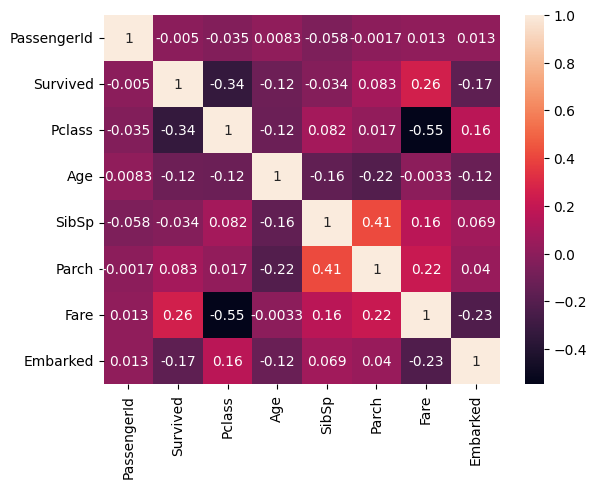

In [37]:
import seaborn as sns
sns.heatmap(z,annot=True)


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Embarked'}>, <Axes: >]], dtype=object)

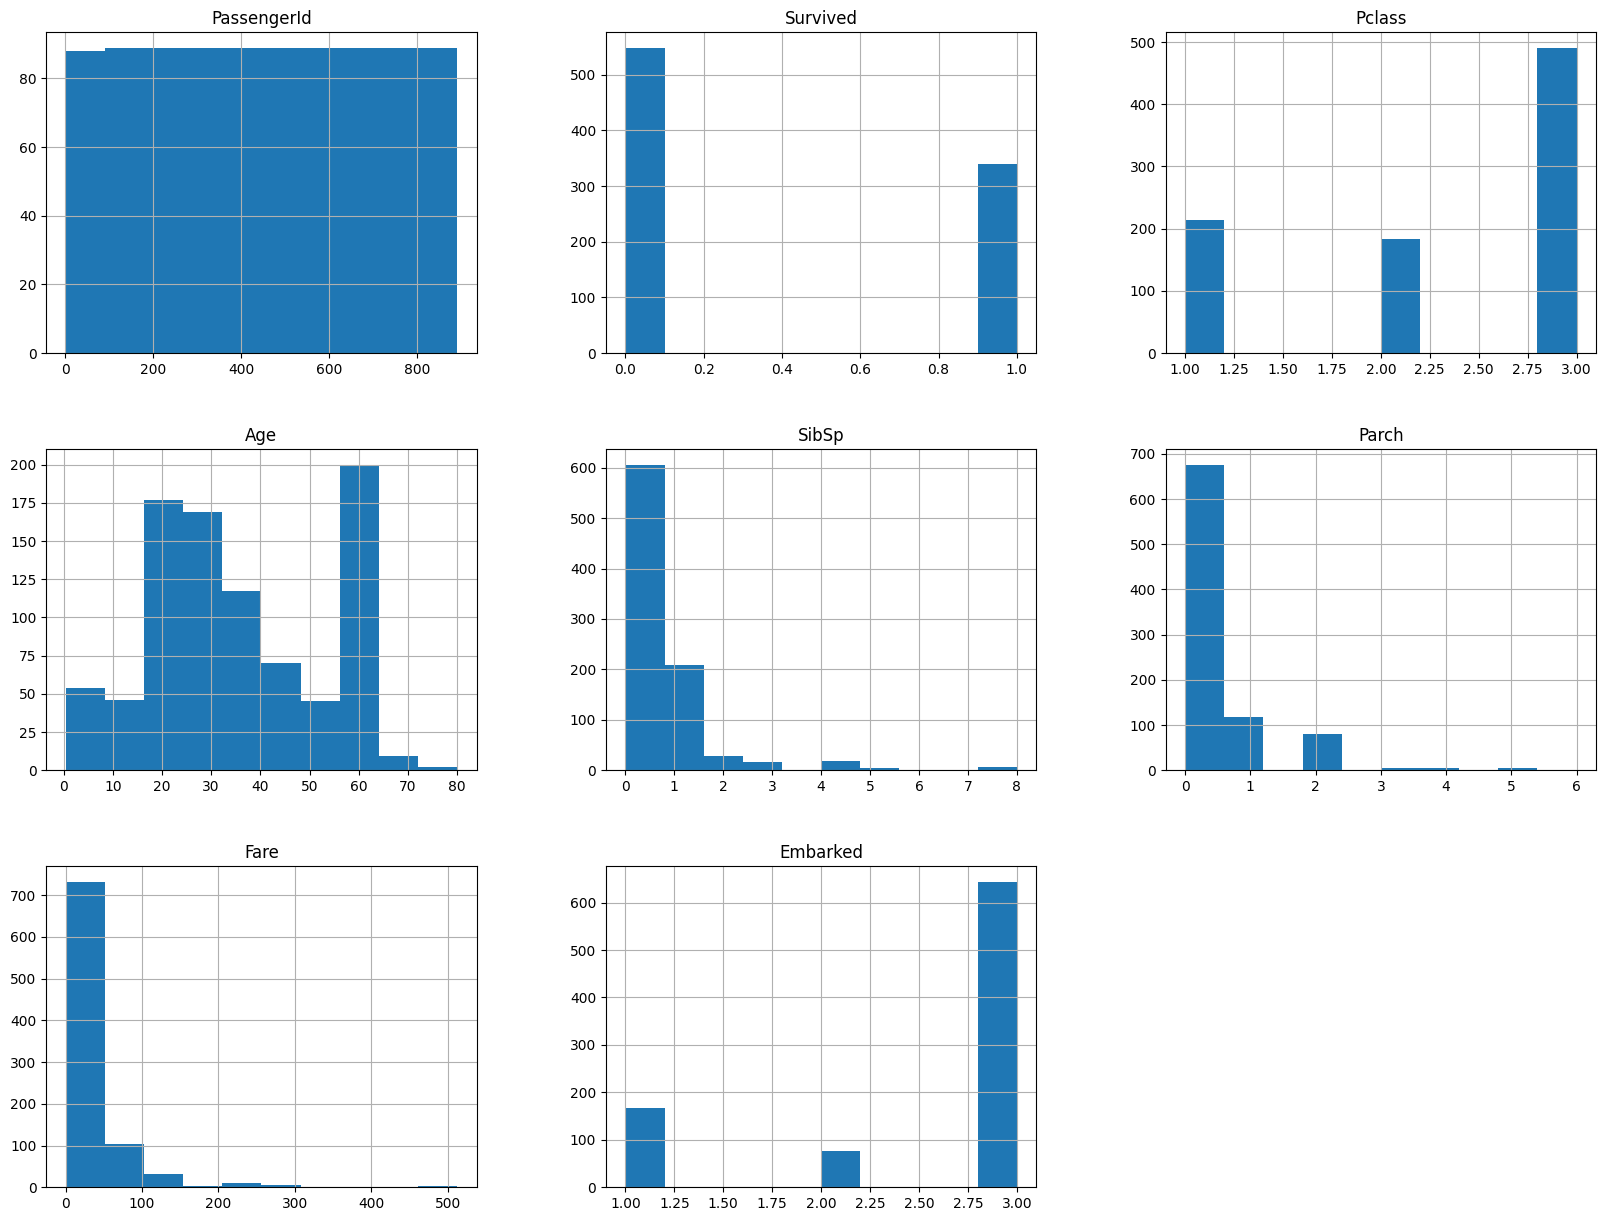

In [38]:
df.hist(figsize=(20,15))



In [39]:
# #use case: we are classifying Titatnic dataset details like Survived,Pclass,Age,sibsp and so on with respect
# # number of passengers travelling from different place
# 1=MANGALORE to BANGALORE
# 2=Mumbai TO bANGALORE
# 3=Andrapradesh TO bANGALORE

In [40]:
y=df.Embarked

In [41]:
y

,Embarked
0,3
1,1
2,3
3,3
4,3
...,...
884,3
885,3
886,3
887,1


In [42]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [43]:
x=df.drop(['Embarked','PassengerId','Sex'],axis=1)
x

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
884,0,2,27.0,0,0,13.0000
885,1,1,19.0,0,0,30.0000
886,0,3,60.0,1,2,23.4500
887,1,1,26.0,0,0,30.0000


In [44]:
from sklearn.model_selection  import train_test_split

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [46]:
#EDA2
!pip install lightgbm

In [47]:
from lightgbm import LGBMClassifier

In [48]:
model=LGBMClassifier()
model.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 186
[LightGBM] [Info] Number of data points in the train set: 595, number of used features: 6
[LightGBM] [Info] Start training from score -1.688081
[LightGBM] [Info] Start training from score -2.418269
[LightGBM] [Info] Start training from score -0.320136
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

LGBMClassifier()

In [53]:
y_pred=model.predict(x_test)
y_pred

array([3, 1, 1, 3, 3, 2, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3,
       3, 3, 3, 1, 3, 3, 2, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3,
       3, 1, 3, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 1, 3, 3, 2, 3, 3, 3,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 1, 3, 3, 3, 3, 1, 3, 2, 1, 3, 3, 3, 1, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 2, 2, 3, 3, 2, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 1,
       1, 3, 3, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 2, 3])

In [54]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 30,   2,  26],
       [  0,  16,   8],
       [ 16,   3, 193]])

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.65      0.52      0.58        58
           2       0.76      0.67      0.71        24
           3       0.85      0.91      0.88       212

    accuracy                           0.81       294
   macro avg       0.75      0.70      0.72       294
weighted avg       0.80      0.81      0.81       294



In [ ]:
# 81 percent good model(you are able to classify 81 percent accurately)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

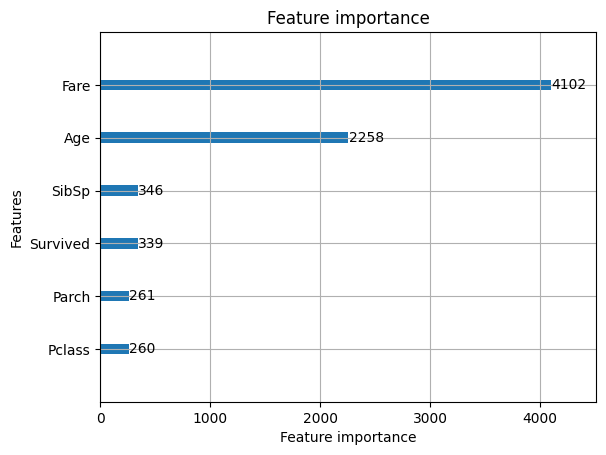

In [56]:
# LGB PLOT
import lightgbm as lgb
lgb.plot_importance(model)
# IT IS A WAY TO UNDERSTAND  WHICH FEATURES IN YOUR DATASET HAVE THE MOST INFLUENCE
# ON THE PREDICTION OF THE MODEL
# it(LGB PLOT) is a barplot silently returns processed  data in descending order